<a href="https://colab.research.google.com/github/tanaya0222/kmeans-clustering/blob/main/kmeans%20ca3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
4    646
2    550
1    511
3    354
0    349
Name: count, dtype: int64


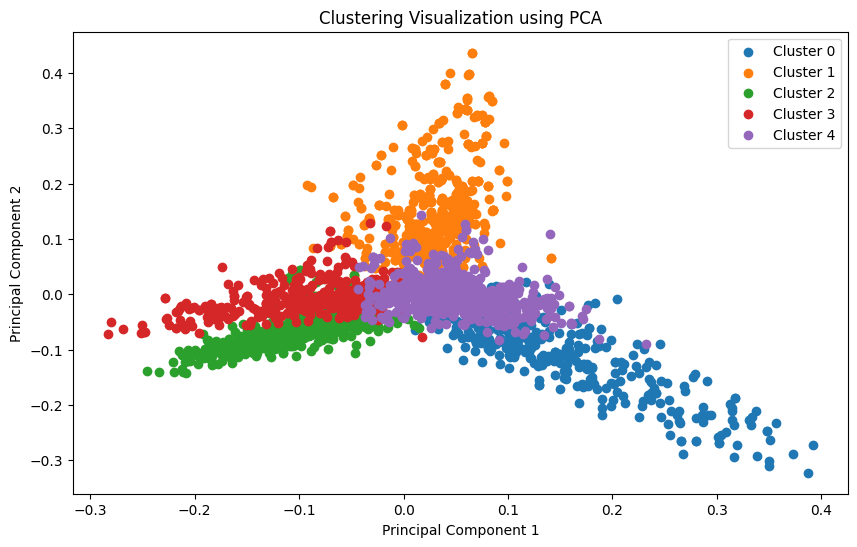

In [ ]:
import pandas as pd
import nltk
nltk.download('words')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, words
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Load the dataset
data = pd.read_csv("BBCNews.csv")

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize NLTK components
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()
english_words = set(words.words())

# Preprocess the text data
def preprocess_text(text):
    tokens = word_tokenize(text.lower())
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token in english_words]
    tokens = [token for token in tokens if token not in stop_words]
    return ' '.join(tokens)

data['preprocessed_text'] = data['descr'].apply(preprocess_text)

# Vectorize the preprocessed text data
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(data['preprocessed_text'])

# Apply k-means clustering
k = 5  # Number of clusters
# kmeans = KMeans(n_clusters=k)
kmeans = KMeans(n_clusters=k, init='random', random_state=42)

kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the dataset
data['cluster'] = cluster_labels

# Print cluster distribution
print(data['cluster'].value_counts())

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Reduce dimensionality of TF-IDF vectors for visualization
pca = PCA(n_components=2)
X_reduced = pca.fit_transform(X.toarray())

# Plot clusters
plt.figure(figsize=(10, 6))
for cluster_label in range(k):
    cluster_data = X_reduced[data['cluster'] == cluster_label]
    plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f'Cluster {cluster_label}')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Clustering Visualization using PCA')
plt.legend()
plt.show()

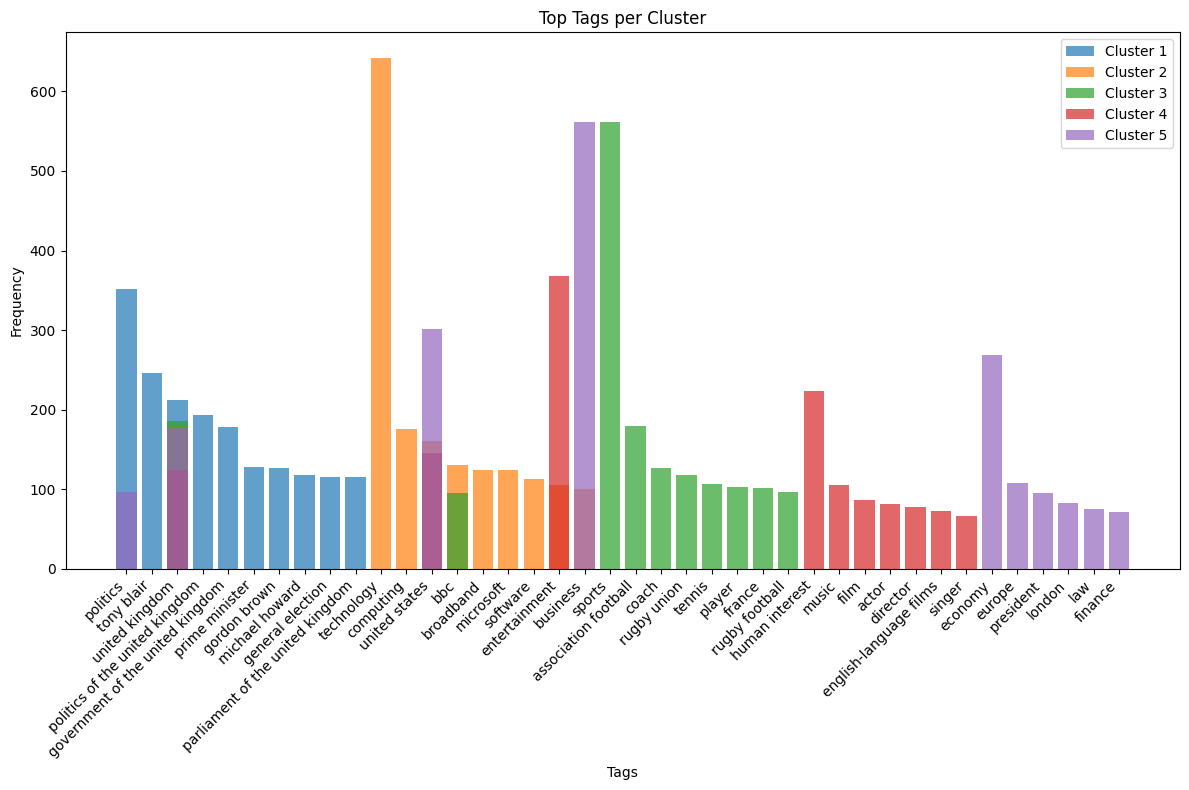

In [ ]:
# Top Keywords or Tags per Cluster
plt.figure(figsize=(12, 8))
for i in range(k):
    cluster_data = data[data['cluster'] == i]['tags']
    cluster_data = cluster_data.str.split(',').explode().str.strip().value_counts()[:10]  # Top 10 tags per cluster
    plt.bar(cluster_data.index, cluster_data.values, alpha=0.7, label=f'Cluster {i+1}')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Tags')
plt.ylabel('Frequency')
plt.title('Top Tags per Cluster')
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sklearn import metrics

# Compute Silhouette Score
silhouette_score = metrics.silhouette_score(X.toarray(), cluster_labels)
print(f"Silhouette Score: {silhouette_score}")

# Compute Calinski-Harabasz Index
calinski_harabasz_score = metrics.calinski_harabasz_score(X.toarray(), cluster_labels)
print(f"Calinski-Harabasz Index: {calinski_harabasz_score}")

# Compute Davies-Bouldin Index
davies_bouldin_score = metrics.davies_bouldin_score(X.toarray(), cluster_labels)
print(f"Davies-Bouldin Index: {davies_bouldin_score}")


Silhouette Score: 0.014770435280500498
Calinski-Harabasz Index: 18.77410940062164
Davies-Bouldin Index: 7.800900870350338


In [ ]:
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    cluster_labels = kmeans.labels_
    silhouette_avg = metrics.silhouette_score(X.toarray(), cluster_labels)
    print(f"For k={k}, the average silhouette score is {silhouette_avg:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=2, the average silhouette score is 0.0095


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=3, the average silhouette score is 0.0107


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=4, the average silhouette score is 0.0117


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=5, the average silhouette score is 0.0138


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=6, the average silhouette score is 0.0148


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=7, the average silhouette score is 0.0145


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=8, the average silhouette score is 0.0141


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=9, the average silhouette score is 0.0166


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For k=10, the average silhouette score is 0.0151


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


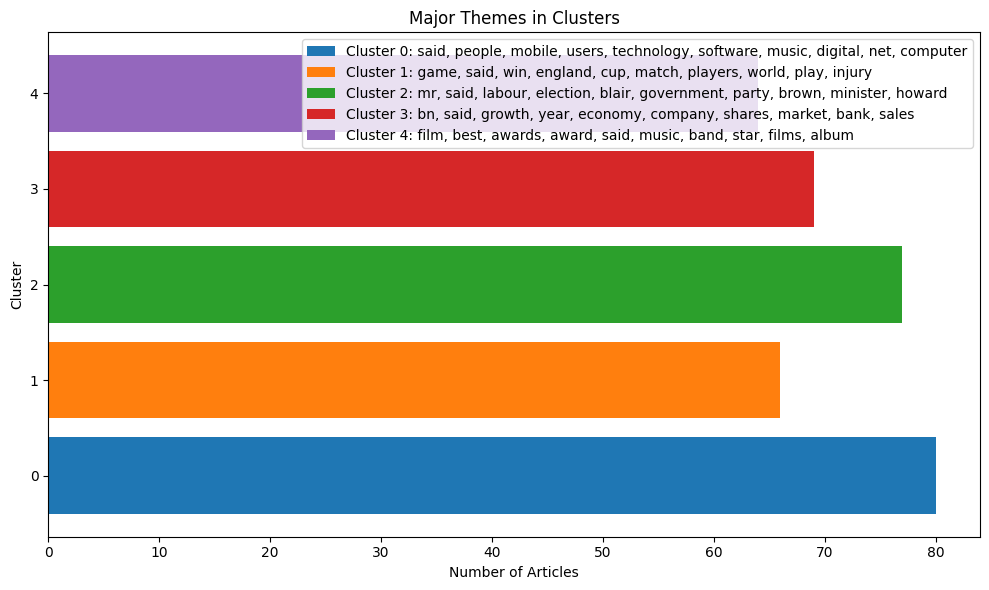

In [ ]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

# Load your dataset
df = pd.read_csv('BBCNews.csv')

# Preprocess the text data
tfidf_vectorizer = TfidfVectorizer(max_features=1000, stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform(df['descr'])

# Apply K-means clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(tfidf_matrix)
df['cluster'] = kmeans.labels_

# Analyze major themes in each cluster
cluster_keywords = {}
for cluster_id in range(5):
    cluster_keywords[cluster_id] = ', '.join(tfidf_vectorizer.get_feature_names_out()[idx]
                                             for idx in kmeans.cluster_centers_.argsort()[:, ::-1][cluster_id, :10])

# Visualize cluster keywords
plt.figure(figsize=(10, 6))
for cluster_id, keywords in cluster_keywords.items():
    plt.barh(str(cluster_id), len(keywords), label=f'Cluster {cluster_id}: {keywords}')
plt.xlabel('Number of Articles')
plt.ylabel('Cluster')
plt.title('Major Themes in Clusters')
plt.legend()
plt.tight_layout()
plt.show()